In [68]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

Create a Browser instance

In [69]:

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [70]:
# open LinkedIn login
driver.get("https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin")

# login with Credentials
username = WebDriverWait(driver, 50).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "input[id='username']")))
password = WebDriverWait(driver, 50).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "input[id='password']")))
username.clear()
username.send_keys("iamananth123@gmail.com")
password.clear()
password.send_keys("anantharaman")


submit_button = WebDriverWait(driver, 50).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']")))
submit_button.click()


In [71]:
# get links -- links contain the direct link to job search with  some predecided job titles. 

links = []
with open("links.txt", "r") as links:
    links = links.readline().split(",") 

print(links)
driver.get(links[0])

['https://www.linkedin.com/jobs/search/?currentJobId=3947262572&keywords=machine%20learning&origin=SWITCH_SEARCH_VERTICAL', 'https://www.linkedin.com/jobs/search/?currentJobId=3967471753&geoId=102713980&keywords=deep%20learning&origin=JOB_SEARCH_PAGE_SEARCH_BUTTON&refresh=true', 'https://www.linkedin.com/jobs/search/?currentJobId=3981401852&geoId=102713980&keywords=computer%20vision&origin=JOB_SEARCH_PAGE_SEARCH_BUTTON&refresh=true']


use this

In [89]:
element = driver.find_element(By.CSS_SELECTOR, '.jobs-search-results-list')

# Check if the element is scrollable vertically
is_scrollable = element.get_attribute('scrollHeight') > element.get_attribute('clientHeight')

# Print the result
print(f"Is the element scrollable? {'Yes' if is_scrollable else 'No'}")
(driver).execute_script("arguments[0].scrollTo(0,6000000);", element)




Is the element scrollable? Yes


and this

In [90]:

(driver).execute_script("arguments[0].scrollTo(0,6000000);", element)


In [33]:
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
job_cards = job_list.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
print(len(job_cards))

link_list = []
card_list = []
for job_card in job_cards:
    
    link = job_card.find_element(By.XPATH, ".//a")
    card_list.append(link)
    link_list.append(link.get_attribute('href'))
    


for i in link_list:
    print(i)

print(card_list)

8
https://www.linkedin.com/jobs/view/3947263411/?eBP=CwEAAAGRCD4z41LOFWkYaoyMlxrVxTLly4QLjT6JIExK1zO26V2f40B4Fv7TEwm2DALM7JCMkL4qjToLQs1kcslhTR9P33yNGc6KrPUhlCSmkl_qAVSZKf83KSW82LYnaTlywExG19Rrnb28EGsIavmsfNc3P0yNNyzo7R0HQbk1yO0pFkTmQ8rvu-8Zlx1prEAH-63s-9Ph_dbLIG1tfbbjU1VT9LDHi3gNXJHQ-gKs8lbpTmeX-161KZpxPzhMiKnGHKZR771LhSV93uyTBEkhlbUrb0feJMXR-scnUK03bKWLjT_QApAWBedOxxketwe-AFbj1mQW15xNxrG8en6E2OIaFkg3CLpjGALA-EXdtr_CwNwvaSC4IIpi9eYRVIIpTYi2-8iKxZvm9GlY-kTSMdiDQmgT3xCoiaOJeJdWY3jRLCUfNU0Zj5SmQCUQ5jzGfej6hkQymd-HGWzsw-VqrZPsWU_3OKkR_SMLeyqWblZy4YrMgxntJG_k2C4&refId=bJ%2FN6bm8bJZCDCz2JwYb0g%3D%3D&trackingId=Goo23%2FYb9FQm3lJkPurxlA%3D%3D&trk=flagship3_search_srp_jobs
https://www.linkedin.com/jobs/view/3963374710/?eBP=CwEAAAGRCD4z41UdDd9SDo8o_sGUpQWgk0PMYvPkKHp3Ug6muU7CdBslFXVH0IFoX3Uv0tlcbQTAo9wl0Y6uQU3tzOa5gRT_t5RIt218o9D2j4-7ZuhWF0gifzVQFFnzkMlWCA0xtGkq5XxNBgLDsaaAfq2WFfrxWC4ROCDoZ1NX4oyMHQb5zKzsw76n22nw8s08B9-FgtZaUdg4UEJ6zcanA9hHYaZciS7TDaABaBBblQ9LuUMixVUGTG7L_WbIvqcGXtnwkKn-QUdp7si

In [134]:
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))

(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_list)


In [88]:
job_cards_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.XPATH, '//div[starts-with(@class, "jobs-search-results-list")]')))
(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_cards_panel)

In [68]:
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))

# scroll to render/ load  all the job cards 
(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_list)


In [79]:
element = driver.find_element(By.XPATH, '//div[@data-results-list-top-scroll-sentinel=""]')
(driver).execute_script("arguments[0].scrollTo(0,6000000);", element)


In [77]:
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.XPATH, "ul[class='scaffold-layout__list-container']")))

(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_list)


In [21]:
for i in card_list:
    i.click()

In [91]:
# grab the web element containing the list of job cards. 
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))

# scroll to render/ load  all the job cards 
(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_list)

# extract the job_cards
job_cards = job_list.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")

print(len(job_cards))

25


In [120]:
driver.get(links[0])

working on this 

In [19]:
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
job_cards = job_list.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
print(len(job_cards))

link_list = []
for job_card in job_cards:
    
    link = job_card.find_element(By.XPATH, ".//a")
    link.click()

    job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

    (driver).execute_script("arguments[0].scrollTo(0,6000000);", job_desc_panel)

    company_name =  job_desc_panel.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
    job_title = job_desc_panel.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']")

    print("company name: ", company_name)
    print("job_title: ", job_title.text)

    child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
    out_text = ""
    for element in child_elements:
        if element.tag_name in ["p", "li"]:
            out_text += element.text

    found_skills = extract_skills(out_text, skill_keywords)
    print(len(found_skills),  "Skills found in the job description:", found_skills)






11
company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Computer Vision and Machine Learning Researcher


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=127.0.6533.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00E28923+23283]
	(No symbol) [0x00DEE934]
	(No symbol) [0x00D20733]
	(No symbol) [0x00D260DF]
	(No symbol) [0x00D27A88]
	(No symbol) [0x00D27B00]
	(No symbol) [0x00D5E747]
	(No symbol) [0x00D8441C]
	(No symbol) [0x00D59485]
	(No symbol) [0x00D846B4]
	(No symbol) [0x00D9CB8D]
	(No symbol) [0x00D841B6]
	(No symbol) [0x00D58017]
	(No symbol) [0x00D5890D]
	GetHandleVerifier [0x00F1A5F3+1013699]
	GetHandleVerifier [0x00F23E4C+1052700]
	GetHandleVerifier [0x00F1D4B4+1025668]
	GetHandleVerifier [0x00E4EA2B+179195]
	(No symbol) [0x00DF6833]
	(No symbol) [0x00DF3198]
	(No symbol) [0x00DF3337]
	(No symbol) [0x00DEB4BE]
	BaseThreadInitThunk [0x762D7BA9+25]
	RtlInitializeExceptionChain [0x7748C10B+107]
	RtlClearBits [0x7748C08F+191]


In [25]:
for i in card_list:
    
    job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

    (driver).execute_script("arguments[0].scrollTo(0,6000000);", job_desc_panel)

    company_name =  job_desc_panel.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
    job_title = job_desc_panel.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']")

    print("company name: ", company_name)
    print("job_title: ", job_title.text)

    child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
    out_text = ""
    for element in child_elements:
        if element.tag_name in ["p", "li"]:
            out_text += element.text

    found_skills = extract_skills(out_text, skill_keywords)
    print(len(found_skills),  "Skills found in the job description:", found_skills)

company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Computer Vision and Machine Learning Researcher
14 Skills found in the job description: ['unsupervised learning', 'programming', 'computer vision', 'tensorflow', 'mathematics', 'neural networks', 'keras', 'object detection', 'big data', 'linear algebra', 'convolutional neural networks', 'deep learning', 'python', 'machine learning']
company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Machine Learning | SDE - 1 / SDE - 2 | PixelBin


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=127.0.6533.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00E28923+23283]
	(No symbol) [0x00DEE934]
	(No symbol) [0x00D20733]
	(No symbol) [0x00D260DF]
	(No symbol) [0x00D27A88]
	(No symbol) [0x00D27B00]
	(No symbol) [0x00D5E747]
	(No symbol) [0x00D8441C]
	(No symbol) [0x00D59485]
	(No symbol) [0x00D846B4]
	(No symbol) [0x00D9CB8D]
	(No symbol) [0x00D841B6]
	(No symbol) [0x00D58017]
	(No symbol) [0x00D5890D]
	GetHandleVerifier [0x00F1A5F3+1013699]
	GetHandleVerifier [0x00F23E4C+1052700]
	GetHandleVerifier [0x00F1D4B4+1025668]
	GetHandleVerifier [0x00E4EA2B+179195]
	(No symbol) [0x00DF6833]
	(No symbol) [0x00DF3198]
	(No symbol) [0x00DF3337]
	(No symbol) [0x00DEB4BE]
	BaseThreadInitThunk [0x762D7BA9+25]
	RtlInitializeExceptionChain [0x7748C10B+107]
	RtlClearBits [0x7748C08F+191]


In [118]:
driver.get(link_list[0])

Working with one job card for now.

In [15]:
# Read the keywords from the file
with open("Skills_Keywords.txt", "r") as file:
    skill_keywords = file.read().strip().split(',')



# Normalize the keywords to lowercase
skill_keywords = [keyword.strip().lower() for keyword in skill_keywords]
len(skill_keywords)

178

In [18]:
import re

def extract_skills(job_description, skill_keywords):
    # Normalize the job description
    job_description = job_description.lower()

    # Extract the skills found in the job description
    found_skills = set()
    for skill in skill_keywords:
        # Use regular expressions to account for whole words and avoid partial matches
        if re.search(r'\b' + re.escape(skill) + r'\b', job_description):
            found_skills.add(skill)
    
    return list(found_skills)


In [111]:
len(job_cards)

25

In [110]:
job_card = job_cards[0]
link = job_card.find_element(By.XPATH, ".//a")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00EEC203+27395]
	(No symbol) [0x00E83E04]
	(No symbol) [0x00D81B7F]
	(No symbol) [0x00D5E483]
	(No symbol) [0x00DEA06F]
	(No symbol) [0x00DFC3D6]
	(No symbol) [0x00DE3736]
	(No symbol) [0x00DB7541]
	(No symbol) [0x00DB80BD]
	GetHandleVerifier [0x011A3AB3+2876339]
	GetHandleVerifier [0x011F7F7D+3221629]
	GetHandleVerifier [0x00F6D674+556916]
	GetHandleVerifier [0x00F7478C+585868]
	(No symbol) [0x00E8CE44]
	(No symbol) [0x00E89858]
	(No symbol) [0x00E899F7]
	(No symbol) [0x00E7BF4E]
	BaseThreadInitThunk [0x76627BA9+25]
	RtlInitializeExceptionChain [0x7780BE3B+107]
	RtlClearBits [0x7780BDBF+191]


In [16]:



job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))
child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
out_text = ""
for element in child_elements:
    if element.tag_name in ["p", "li"]:
        out_text += element.text



"On-site\nMatches your job preferences, workplace type is On-site.\nFull-time\nMatches your job preferences, job type is Full-time.\nAssociate2 school alumni work here6 of 10 skills match your profile - you may be a good fitSee how you compare to over 100 other people who clicked Apply. Reactivate PremiumAm I a good fit for this job?How can I best position myself for this job?Tell me more about Great Lea...RoleOwn the quality of end to end learning experience for our global flagship programs in the domain of analytics, data science and artificial intelligenceOwn the hands on development of all the different components of the learning experience, including but not limited to video content, hands-on/ labs material, projects and various other learning activities/interventions. This will include engaging with SMEs/faculties/industry experts.Be a mentor / training assistant to hundreds of global professional by providing technical support, guidance and feedback in a timely mannerDevelop and

In [112]:
for job_card in job_cards:
    link = job_card.find_element(By.XPATH, ".//a")
    print(link.get_attribute('href'))


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00EEC203+27395]
	(No symbol) [0x00E83E04]
	(No symbol) [0x00D81B7F]
	(No symbol) [0x00D5E483]
	(No symbol) [0x00DEA06F]
	(No symbol) [0x00DFC3D6]
	(No symbol) [0x00DE3736]
	(No symbol) [0x00DB7541]
	(No symbol) [0x00DB80BD]
	GetHandleVerifier [0x011A3AB3+2876339]
	GetHandleVerifier [0x011F7F7D+3221629]
	GetHandleVerifier [0x00F6D674+556916]
	GetHandleVerifier [0x00F7478C+585868]
	(No symbol) [0x00E8CE44]
	(No symbol) [0x00E89858]
	(No symbol) [0x00E899F7]
	(No symbol) [0x00E7BF4E]
	BaseThreadInitThunk [0x76627BA9+25]
	RtlInitializeExceptionChain [0x7780BE3B+107]
	RtlClearBits [0x7780BDBF+191]


In [113]:
job_card = job_cards[0]
link = job_card.find_element(By.XPATH, ".//a")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00EEC203+27395]
	(No symbol) [0x00E83E04]
	(No symbol) [0x00D81B7F]
	(No symbol) [0x00D5E483]
	(No symbol) [0x00DEA06F]
	(No symbol) [0x00DFC3D6]
	(No symbol) [0x00DE3736]
	(No symbol) [0x00DB7541]
	(No symbol) [0x00DB80BD]
	GetHandleVerifier [0x011A3AB3+2876339]
	GetHandleVerifier [0x011F7F7D+3221629]
	GetHandleVerifier [0x00F6D674+556916]
	GetHandleVerifier [0x00F7478C+585868]
	(No symbol) [0x00E8CE44]
	(No symbol) [0x00E89858]
	(No symbol) [0x00E899F7]
	(No symbol) [0x00E7BF4E]
	BaseThreadInitThunk [0x76627BA9+25]
	RtlInitializeExceptionChain [0x7780BE3B+107]
	RtlClearBits [0x7780BDBF+191]


In [108]:
job_card = job_cards[0]
link = job_card.find_element(By.XPATH, ".//a")
# Opening a particular Job card to reveal the Job description.
link.click()

# Grabbing the div element that cotains the Job description.
job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

# Scrolling to load all the contents of the JD
(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_desc_panel)

company_name =  job_desc_panel.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
job_title = job_desc_panel.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']")

print("company name: ", company_name)
print("job_title: ", job_title.text)


job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

# parsing the JD for key-words 
child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
out_text = ""
for element in child_elements:
    if element.tag_name in ["p", "li"]:
        out_text += element.text


out_text


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00EEC203+27395]
	(No symbol) [0x00E83E04]
	(No symbol) [0x00D81B7F]
	(No symbol) [0x00D5E483]
	(No symbol) [0x00DEA06F]
	(No symbol) [0x00DFC3D6]
	(No symbol) [0x00DE3736]
	(No symbol) [0x00DB7541]
	(No symbol) [0x00DB80BD]
	GetHandleVerifier [0x011A3AB3+2876339]
	GetHandleVerifier [0x011F7F7D+3221629]
	GetHandleVerifier [0x00F6D674+556916]
	GetHandleVerifier [0x00F7478C+585868]
	(No symbol) [0x00E8CE44]
	(No symbol) [0x00E89858]
	(No symbol) [0x00E899F7]
	(No symbol) [0x00E7BF4E]
	BaseThreadInitThunk [0x76627BA9+25]
	RtlInitializeExceptionChain [0x7780BE3B+107]
	RtlClearBits [0x7780BDBF+191]


In [56]:
found_skills = extract_skills(out_text, skill_keywords)
print(len(found_skills),  "Skills found in the job description:", found_skills)

21 Skills found in the job description: ['programming', 'azure', 'neural networks', 'spark', 'machine learning', 'pandas', 'sql', 'mathematics', 'regression', 'clustering', 'tensorflow', 'pytorch', 'xgboost', 'gcp', 'mlflow', 'statistics', 'curiosity', 'numpy', 'deep learning', 'python', 'aws']


In [ ]:
out_text

'Remote\nMatches your job preferences, workplace type is Remote.\nInternship InternshipSkills: Neural Machine Translation (NMT), Large Language Models (LLM)See how you compare to over 100 other applicants. Reactivate PremiumAm I a good fit for this job?How can I best position myself for this job?Tell me more about Sony Rese...Sony Research India is driving cutting-edge research and development in various locations around the globe, including laboratories in Japan, the United States, Europe, and Asia. We endeavor to create new technology, products, and services while sustaining Sony Group’s diverse businesses in electronics, entertainment, and financial fields. For our research center to blaze a trail in the latest technologies, we seek to foster the growth of a diverse pool of engineering talent and create a technology talent bank to drive research excellence worldwide. Sony Research India (SRI) is offering outstanding career opportunities around frontline technologies such as AI and d

In [32]:
link.get_attribute('href')

'https://www.linkedin.com/jobs/view/3982947346/?eBP=BUDGET_EXHAUSTED_JOB&refId=Mc0GTF9NRQdPTOl2Bhoo5Q%3D%3D&trackingId=isG9b6OxLfWrO6KKwUzeDQ%3D%3D&trk=flagship3_search_srp_jobs'

test code

In [142]:
import time

for job_card in job_cards:

    link = job_card.find_element(By.XPATH, ".//a")
    # Opening a particular Job card to reveal the Job description.
    link.click()

    print(link.get_attribute('href'))

    # Grabbing the div element that cotains the Job description.
    job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

    # Scrolling to load all the contents of the JD
    (driver).execute_script("arguments[0].scrollTo(0,6000000);", job_desc_panel)

    company_name =  job_desc_panel.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
    job_title = job_desc_panel.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']")

    print("company name: ", company_name)
    print("job_title: ", job_title.text)

    # parsing the JD for key-words 
    job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

    child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
    out_text = ""
    for element in child_elements:
        if element.tag_name in ["p", "li"]:
            out_text += element.text


    found_skills = extract_skills(out_text, skill_keywords)
    print(len(found_skills),  "Skills found in the job description:", found_skills)
    time.sleep(5)


https://www.linkedin.com/jobs/view/3947263411/?eBP=CwEAAAGQ_i7efWzgonR1sp-oT76Ov5yUNSf1kxVrxfXjCPvgwK-hzqBxO8kvi9alqfOkQUxwfdr6OctufFRLsnCU9QZCqx8-CG4f21yaI2Zqvy_vUzWOjg0m8hfmKFqbgnkXzhYBvmfa9_n-PA9D5oz3xyuOwarvFsGxwBWfqM4D1XwNZ72pV16xdJr9MeTycgvSztOxPJpGYW4HjSI-1jYT2VCn_EAYWAuD62puiRhww3NR-G5EpAQeUq0HCVmyQvglP8lTaLXZgd-78HvLMtr0NDOjAHTDeuCJg4YPbPHrVfb9H_Vd5fUTM70OX3nKJbKi_YPqr2jZYfppgGPk0E2561NW6-HvTjlycqfaQLlAOsoxmil3dNhw8DB5JPabU2cFYqnJELjVkDC32J_R7Z42kJU23tJdfD4gEuuARC_XTVCZBfL07eOXLvA4WzoPu8Po0l8zfQa90YuUC-k-3FjycJcQcsDxbkUiVwWPPt-MJWA0gUlnIE05siOAKFY&refId=CEBrs%2B4oU1krhalgIxoUng%3D%3D&trackingId=fsefSf1R%2BhlLqMoxD8p39w%3D%3D&trk=flagship3_search_srp_jobs
company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Computer Vision and Machine Learning Researcher


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=126.0.6478.127); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00EEC203+27395]
	(No symbol) [0x00E83E04]
	(No symbol) [0x00D81B7F]
	(No symbol) [0x00D86C7F]
	(No symbol) [0x00D888F8]
	(No symbol) [0x00D88970]
	(No symbol) [0x00DBDFA7]
	(No symbol) [0x00DE399C]
	(No symbol) [0x00DB8C15]
	(No symbol) [0x00DE3C34]
	(No symbol) [0x00DFCB24]
	(No symbol) [0x00DE3736]
	(No symbol) [0x00DB7541]
	(No symbol) [0x00DB80BD]
	GetHandleVerifier [0x011A3AB3+2876339]
	GetHandleVerifier [0x011F7F7D+3221629]
	GetHandleVerifier [0x00F6D674+556916]
	GetHandleVerifier [0x00F7478C+585868]
	(No symbol) [0x00E8CE44]
	(No symbol) [0x00E89858]
	(No symbol) [0x00E899F7]
	(No symbol) [0x00E7BF4E]
	BaseThreadInitThunk [0x76627BA9+25]
	RtlInitializeExceptionChain [0x7780BE3B+107]
	RtlClearBits [0x7780BDBF+191]


In [35]:
driver.get(link_list[0])
see_more_button = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "button[aria-label='Click to see more description']")))
see_more_button.click()

In [56]:
conpany_details = {"company_name":[], "job_title": [], "job_description":[], "required_skills": []}

In [57]:
for link in link_list:
    driver.get(link)
    see_more_button = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "button[aria-label='Click to see more description']")))
    see_more_button.click()
    company_name =  driver.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
    job_title = driver.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']").text
    conpany_details["company_name"].append(company_name)
    conpany_details["job_title"].append(job_title)
    company_details["job_description"].append()
    print("company name: ", company_name)
    print("job_title: ", job_title)

    job_cdesc_container = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.XPATH, '//article[starts-with(@class, "jobs-description__container")]')))


    child_elements = job_cdesc_container.find_elements(By.XPATH, ".//*")
    out_text = ""
    for element in child_elements:
        if element.tag_name in ["p", "li"]:
            out_text += element.text

    
    print(out_text)

    found_skills = extract_skills(out_text, skill_keywords)
    # print(len(found_skills),  "Skills found in the job description:", found_skills)
    conpany_details["required_skills"].append(found_skills)




company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Computer Vision and Machine Learning Researcher
company name:  Samsung Electro-Mechanics
job_title:  Image Processing Engineer
company name:  ADA
job_title:  Machine Learning Scientist
company name:  Zeitview 
job_title:  ML Engineer
company name:  Brick & Bolt
job_title:  Machine Learning Engineer
company name:  Fynd (Shopsense Retail Technologies Ltd.)
job_title:  Machine Learning | SDE - 1 / SDE - 2 | PixelBin
company name:  Lytx, Inc.
job_title:  Machine Learning Scientist I
company name:  RentoMojo
job_title:  Data Science & ML Engineer


In [ ]:
see_more_button = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "button[aria-label='Click to see more description']")))

job_desc_panel = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "div[class='jobs-search__job-details--wrapper']")))

(driver).execute_script("arguments[0].scrollTo(0,6000000);", job_desc_panel)

company_name =  job_desc_panel.find_element(By.XPATH, ".//div[@class = 'job-details-jobs-unified-top-card__company-name']").text
job_title = job_desc_panel.find_element(By.XPATH,".//h1[@class = 't-24 t-bold inline']")

print("company name: ", company_name)
print("job_title: ", job_title.text)

child_elements = job_desc_panel.find_elements(By.XPATH, ".//*")
out_text = ""
for element in child_elements:
    if element.tag_name in ["p", "li"]:
        out_text += element.text

found_skills = extract_skills(out_text, skill_keywords)
print(len(found_skills),  "Skills found in the job description:", found_skills)

In [54]:
print(conpany_details)

{'company_name': 'RentoMojo', 'job_title': 'Data Science & ML Engineer', 'required_skills': ['r', 'collaboration', 'scikit-learn', 'programming', 'numpy', 'tensorflow', 'pandas', 'problem-solving', 'data analysis', 'presentation skills', 'optimization', 'python', 'lstm', 'machine learning']}


In [59]:
import pandas as pd
df = pd.DataFrame(conpany_details)

In [61]:
skills = []
for i in df.required_skills:
    skills.extend(i)

skills

['unsupervised learning',
 'python',
 'programming',
 'computer vision',
 'tensorflow',
 'mathematics',
 'neural networks',
 'keras',
 'object detection',
 'linear algebra',
 'convolutional neural networks',
 'deep learning',
 'machine learning',
 'pytorch',
 'software development',
 'programming',
 'computer vision',
 'communication skills',
 'tensorflow',
 'version control',
 'problem-solving',
 'optimization',
 'machine learning',
 'pytorch',
 'tensorflow',
 'statistics',
 'sql',
 'problem-solving',
 'python',
 'machine learning',
 'pytorch',
 'python',
 'computer vision',
 'deep learning',
 'machine learning',
 'computer vision',
 'problem-solving',
 'transfer learning',
 'data augmentation',
 'machine learning',
 'gcp',
 'pytorch',
 'computer vision',
 'feature store',
 'onnx',
 'tensorflow',
 'classification',
 'java',
 'keras',
 'object detection',
 'business analytics',
 'scala',
 'machine learning',
 'feature engineering',
 'optimization',
 'deep learning',
 'programming',
 'n

C:\Users\sudar\AppData\Local\Temp\ipykernel_12132\3644860263.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'unsupervised learning'),
 Text(1, 0, 'python'),
 Text(2, 0, 'programming'),
 Text(3, 0, 'computer vision'),
 Text(4, 0, 'tensorflow'),
 Text(5, 0, 'mathematics'),
 Text(6, 0, 'neural networks'),
 Text(7, 0, 'keras'),
 Text(8, 0, 'object detection'),
 Text(9, 0, 'linear algebra'),
 Text(10, 0, 'convolutional neural networks'),
 Text(11, 0, 'deep learning'),
 Text(12, 0, 'machine learning'),
 Text(13, 0, 'pytorch'),
 Text(14, 0, 'software development'),
 Text(15, 0, 'communication skills'),
 Text(16, 0, 'version control'),
 Text(17, 0, 'problem-solving'),
 Text(18, 0, 'optimization'),
 Text(19, 0, 'statistics'),
 Text(20, 0, 'sql'),
 Text(21, 0, 'transfer learning'),
 Text(22, 0, 'data augmentation'),
 Text(23, 0, 'gcp'),
 Text(24, 0, 'feature store'),
 Text(25, 0, 'onnx'),
 Text(26, 0, 'classification'),
 Text(27, 0, 'java'),
 Text(28, 0, 'business analytics'),
 Text(29, 0, 'scala'),
 Text(30, 0, 'feature engineering'),
 Text(31, 0, 'numpy'),
 Text(32, 0, 'aws'),
 Text(33, 

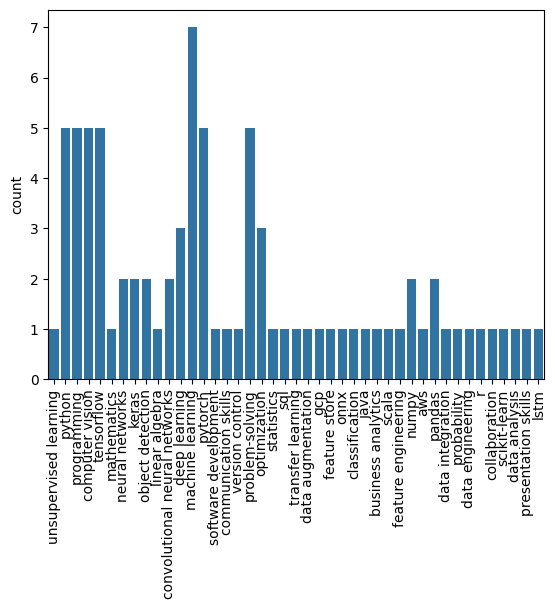

In [64]:
import seaborn as sb

my_plot = sb.countplot(x = skills)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


In [66]:
out_text

' Data Analysis and Preprocessing:Collect, clean, and preprocess data from various sources including order data, vehicle usage data, and inventory levels.Identify patterns and trends in historical data to understand demand fluctuations. Predictive Modeling:Develop and implement predictive models to forecast vehicle requirements for logistics based on historical order data, vehicle usage trends, and other relevant factors.Create inventory prediction models to optimize procurement and ensure adequate stock levels. Optimization:Use advanced analytics and machine learning techniques to optimize routing and scheduling of vehicles, considering constraints like operating hours, touchpoints, and distance.Integrate constraints related to vehicle capacity, delivery times, and geographic distribution. Blockchain Integration (Optional):Explore the potential of blockchain technology for enhancing supply chain transparency, smart contracts, and proof of delivery systems.Collaborate with the tech tea

In [67]:
import re

def extract_years_of_experience(text):
    # Regular expression to find patterns like "2+ years", "3 years of experience", "5+ years"
    pattern = r'(\d+\+?)\s*(years|yrs|years of experience)'
    matches = re.findall(pattern, text, re.IGNORECASE)
    
    # Extract and return the first number found
    if matches:
        return matches[0][0]
    return None

# Example job description text
job_description = """
As a Machine Learning Engineer, the purpose of this role is to work with our machine learning research team to develop, implement and deploy machine learning and deep learning models. Our core area of work is in the field of computer vision so you will require some familiarity with convolutional neural networks.

...

Some specific requirements
2+ years of experience implementing and deploying machine learning and deep learning frameworks through distributions cluster and application programming in cloud platforms including AWS and GCP.
"""

years_of_experience = extract_years_of_experience(job_description)
print(years_of_experience)


2+


In [104]:
import time
base_url = "https://www.linkedin.com/jobs/search/?currentJobId=3947263411&keywords=machine%20learning&origin=SWITCH_SEARCH_VERTICAL&start="

for i in range(3):
    driver.get(base_url + str(i))
    # job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
    # job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
    element = driver.find_element(By.CSS_SELECTOR, '.jobs-search-results-list')
    job_cards = element.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
    print(len(job_cards))
    # job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
    (driver).execute_script("arguments[0].scrollTo(0,6000);", element)
    job_cards = element.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
    print(len(job_cards))
    # time.sleep(5)       


7
7
9
9
10
10


ember-view   jobs-search-results__list-item occludable-update p0 relative scaffold-layout__list-item

In [112]:
base_url = "https://www.linkedin.com/jobs/search/?currentJobId=3947263411&keywords=machine%20learning&origin=SWITCH_SEARCH_VERTICAL&start="


driver.get(base_url + "25")
element = driver.find_element(By.CSS_SELECTOR, '.jobs-search-results-list')
job_list = WebDriverWait(driver, 10).until(ec.element_to_be_clickable((By.CSS_SELECTOR, "ul[class='scaffold-layout__list-container']")))
(driver).execute_script("arguments[0].scrollTo(0,6000000);", element)
job_cards = element.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
len(job_cards)

6

In [122]:
job_cards = element.find_elements(By.XPATH, ".//div[@data-view-name = 'job-card']")
len(job_cards)

7